<a href="https://colab.research.google.com/github/donalrinho/Bc2JpsiMuNu/blob/main/Bc2JpsiMuNu_RapidSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and interacting with the $B_c^+ \to J/\psi \mu^+ \nu_\mu$ RapidSim MC file

In this notebook, we load a sample of $B_c^+ \to J/\psi \mu^+ \nu_\mu$ decays generated using the [RapidSim](https://github.com/gcowan/RapidSim) package. We will look at some variables, and calculate interesting new variables such as the angles of the decay which we'll be focusing on in this project.

First, we install the `uproot` package for loading ROOT files into Python. We will load the `TTree` from the ROOT file into a `pandas` `DataFrame`. 

Using `!` at the beginnging of our cell here runs commands on the command line for us.

In [1]:
!pip install uproot

In [2]:
#Import some useful packages
import uproot
import numpy as np
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

## Loading a ROOT file with the `uproot` package

Load $B_c^+ \to J/\psi \mu^+ \nu_\mu$ RapidSim MC ROOT file from my own Google Drive (you will need to copy the files to your own Google drive and access them from there):

In [29]:
#Path to RapidSim Bc -> J/psi mu nu file
drive_dir = "/content/drive/MyDrive/Bc2JpsiMuNu_ROOT_files"
file_path = f"{drive_dir}/Bc2JpsiMuNu_RapidSim"
print(f"Loading ROOT file {file_path}.root")
tree_name = "DecayTree"
events = uproot.open(f"{file_path}.root:{tree_name}")
events

Loading ROOT file /content/drive/MyDrive/Bc2JpsiMuNu_ROOT_files/Bc2JpsiMuNu_RapidSim.root


<TTree 'DecayTree' (136 branches) at 0x7fc8bb8b7250>

In [4]:
#Make pandas DataFrame
df = events.arrays(library="pd")

In [5]:
#Check how many events we have in our DataFrame (same as the number of events in the ROOT TTree)
len(df)

1000000

We see that we have 1 million events in the DataFrame, which is because we generated 1 million events with RapidSim (so this is how many events there are in the input ROOT file).

We can have a look at what variables are in the DataFrame:

In [6]:
#Variables in our file (these are the branches from the TTree called DecayTree in our ROOT file)
for x in df.columns:
  print(x)

nEvent
Bc_M
Bc_M_TRUE
Jpsi_M
Jpsi_M_TRUE
Bc_P
Bc_P_TRUE
Jpsi_P
Jpsi_P_TRUE
Bc_PT
Bc_PT_TRUE
Jpsi_PT
Jpsi_PT_TRUE
Bc_PX
Bc_PX_TRUE
Jpsi_PX
Jpsi_PX_TRUE
Bc_PY
Bc_PY_TRUE
Jpsi_PY
Jpsi_PY_TRUE
Bc_PZ
Bc_PZ_TRUE
Jpsi_PZ
Jpsi_PZ_TRUE
Bc_E
Bc_E_TRUE
Jpsi_E
Jpsi_E_TRUE
Bc_End_x
Bc_End_x_TRUE
Jpsi_End_x
Jpsi_End_x_TRUE
Bc_End_y
Bc_End_y_TRUE
Jpsi_End_y
Jpsi_End_y_TRUE
Bc_End_z
Bc_End_z_TRUE
Jpsi_End_z
Jpsi_End_z_TRUE
Bc_Ori_x
Bc_Ori_x_TRUE
Jpsi_Ori_x
Jpsi_Ori_x_TRUE
Bc_Ori_y
Bc_Ori_y_TRUE
Jpsi_Ori_y
Jpsi_Ori_y_TRUE
Bc_Ori_z
Bc_Ori_z_TRUE
Jpsi_Ori_z
Jpsi_Ori_z_TRUE
Bc_FD
Bc_FD_TRUE
Jpsi_FD
Jpsi_FD_TRUE
Bc_FD_x
Bc_FD_x_TRUE
Jpsi_FD_x
Jpsi_FD_x_TRUE
Bc_FD_y
Bc_FD_y_TRUE
Jpsi_FD_y
Jpsi_FD_y_TRUE
Bc_FD_z
Bc_FD_z_TRUE
Jpsi_FD_z
Jpsi_FD_z_TRUE
Bc_gamma
Bc_gamma_TRUE
Jpsi_gamma
Jpsi_gamma_TRUE
Bc_beta
Bc_beta_TRUE
Jpsi_beta
Jpsi_beta_TRUE
Bc_eta
Bc_eta_TRUE
Jpsi_eta
Jpsi_eta_TRUE
Mu_P
Mu_P_TRUE
Nu_P
Nu_P_TRUE
Jpsi_Mu0_P
Jpsi_Mu0_P_TRUE
Jpsi_Mu1_P
Jpsi_Mu1_P_TRUE
Mu_PT
Mu_PT_TRUE
Nu_PT
Nu_PT_TRUE
Jpsi_Mu

Let's take a closer look at some variables in the file. Here we look at the reconstructed mass of the decay, $m(J/\psi \mu^+)$ - the neutrino cannot be seen inside LHCb, so this variable is the visible mass of the decay. In the ROOT file this variable is called `Bc_M`, and thus it also has this name in our DataFrame object `df`.|

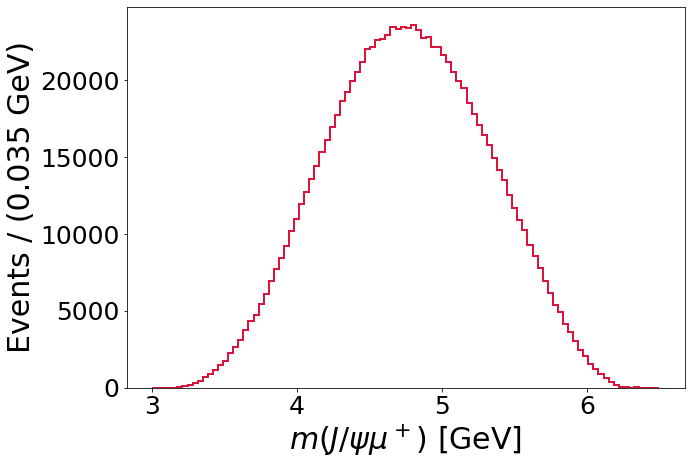

In [7]:
fig, ax = plt.subplots(figsize=(10,7))
var_to_plot = "Bc_M"
bins = 100
x_range = [3., 6.5] #Mass is in GeV
bin_width = (x_range[1] - x_range[0])/bins
plt.hist(df[var_to_plot], histtype="step", color="crimson", linewidth=2, bins=bins, range=x_range)
plt.xlabel("$m(J/\psi \mu^+)$ [GeV]",fontsize=30)
plt.ylabel(f"Events / ({bin_width} GeV)", fontsize=30)
ax.tick_params(axis='both', which='both', labelsize=25)
plt.show();

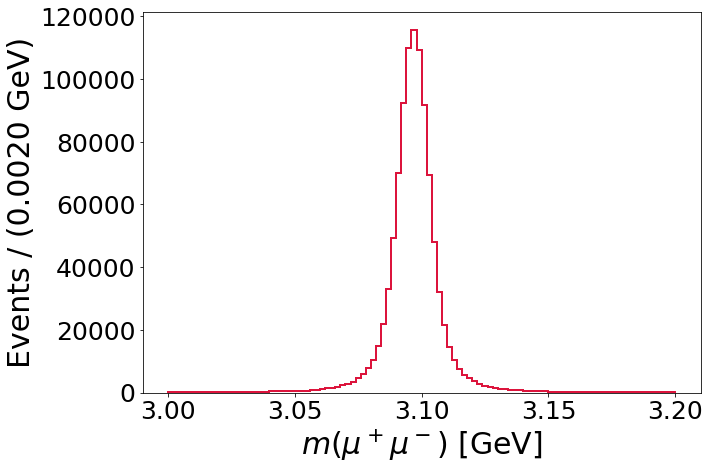

In [8]:
#Look at the J/psi mass, which is reconstructed from combining two muons
fig, ax = plt.subplots(figsize=(10,7))
var_to_plot = "Jpsi_M"
bins = 100
x_range = [3.0, 3.2] #Mass is in GeV
bin_width = (x_range[1] - x_range[0])/bins
plt.hist(df[var_to_plot], histtype="step", color="crimson", linewidth=2, bins=bins, range=x_range)
plt.xlabel("$m(\mu^+ \mu^-)$ [GeV]",fontsize=30)
plt.ylabel(f"Events / ({bin_width:.4f} GeV)", fontsize=30) #:4f tells it to print 4 decimal places
ax.tick_params(axis='both', which='both', labelsize=25)
plt.show();

The clear peak here is because we have a $J/\psi$ meson in the decay, which subsequently decays to two muons. The invariant mass of the pair of muons peaks srongly at the known mass of the $J/\psi$ meson (see the PDG [here](https://pdglive.lbl.gov/Particle.action?init=0&node=M070&home=MXXX025)).

## Decay angles

In this project, we are interested in the decay angles which characterise the physics of the $B_c^+ \to J/\psi \mu^+ \nu_\mu$ decay. There are three angles:

1. $\theta_{J/\psi}$: the angle between the direction $\mu^+$ from the $J/\psi$, and the direction opposite that of the $B_c^+$ momentum, calculated in the $J/\psi$ rest frame.
2. $\theta_W$: the angle between the direction of the $\mu^+$ produced in the $B_c^+$ decay, and the direction opposite the $B_c^+$ momentum, calculated in the $W^+$ boson rest frame. Here, the $W^+$ boson is produced in the decay of the $B_c^+$ meson, and it subsequently decays to the $\mu^+ \nu_\mu$ pair.
3. $\chi$: the angle between the plane containing the $\mu^+$ and $\mu^-$ from the $J/\psi$, and the plane containing the $\mu^+$ and $\nu_\mu$ from the $W^+$. The angle is defined in the $B_c^+$ rest frame.

For a visualisation of these angles, take a look at [this paper](https://arxiv.org/pdf/2007.06957.pdf). We want to calculate these decay angles and add them to our dataframe. To do this, we will write some helper functions, and use the `vector` package in Python to create some 4-vectors.

In this project, we will use the RapidSim MC sample to inform us about the MC-truth distributions of the decay angles. Because of the missing neutrino, this is not what we actually deal with in real life. But we can use the `_TRUE` variables in our RapidSim sample to calculate the true values of the decay angles, using the true 4-vectors for the various particles in the decay.

In [9]:
#We use the vector package to make 4-vectors and manipulate them to calculate the decay angles
!pip install vector

In [10]:
#Import the package
import vector

In [11]:
def calc_theta_Jpsi(df):
  """
  Calculate the decay angle theta_Jpsi.

    Parameters:
      df -- input DataFrame (must containin the TRUE PX, PY, PZ, E values for each particle)
    
    Returns:
      theta_Jpsi -- decay angle values as a numpy array, which can be added to user DataFrame as a new column
  """
  
  #Muon from the J/psi with the same charge as the Bc
  Jpsi_Mu_vars = {"px": "Jpsi_Mu0_PX_TRUE",
                  "py": "Jpsi_Mu0_PY_TRUE",
                  "pz": "Jpsi_Mu0_PZ_TRUE",
                  "e": "Jpsi_Mu0_E_TRUE"}
  
  #J/psi
  Jpsi_vars = {"px": "Jpsi_PX_TRUE",
               "py": "Jpsi_PY_TRUE",
               "pz": "Jpsi_PZ_TRUE",
               "e": "Jpsi_E_TRUE"}
  
  #Bc
  Bc_vars = {"px": "Bc_PX_TRUE",
             "py": "Bc_PY_TRUE",
             "pz": "Bc_PZ_TRUE",
             "e": "Bc_E_TRUE"}
  
  #4-vectors
  v_Jpsi_Mu = vector.obj(x=df[Jpsi_Mu_vars["px"]],
                         y=df[Jpsi_Mu_vars["py"]],
                         z=df[Jpsi_Mu_vars["pz"]],
                         t=df[Jpsi_Mu_vars["e"]])
  
  v_Jpsi = vector.obj(x=df[Jpsi_vars["px"]],
                      y=df[Jpsi_vars["py"]],
                      z=df[Jpsi_vars["pz"]],
                      t=df[Jpsi_vars["e"]])
  
  v_Bc = vector.obj(x=df[Bc_vars["px"]],
                    y=df[Bc_vars["py"]],
                    z=df[Bc_vars["pz"]],
                    t=df[Bc_vars["e"]])
  
  #Boost to Bc rest frame
  Bc_boost_vec = -(v_Bc.to_beta3())
  v_Jpsi_Mu = v_Jpsi_Mu.boost_beta3(Bc_boost_vec)
  v_Jpsi = v_Jpsi.boost_beta3(Bc_boost_vec)
  v_Bc = v_Bc.boost_beta3(Bc_boost_vec)

  #Boost to J/psi rest frame
  Jpsi_boost_vec = -(v_Jpsi.to_beta3())
  v_Jpsi_Mu = v_Jpsi_Mu.boost_beta3(Jpsi_boost_vec)
  v_Bc = v_Bc.boost_beta3(Jpsi_boost_vec)
  
  #3-vectors
  v3_Jpsi_Mu = v_Jpsi_Mu.to_beta3()
  v3_Bc = v_Bc.to_beta3()
  #Unit vectors
  v3_Jpsi_Mu = v3_Jpsi_Mu / v3_Jpsi_Mu.mag
  v3_Bc = v3_Bc / v3_Bc.mag

  #Angle
  theta_Jpsi = v3_Jpsi_Mu.deltaangle(-v3_Bc)

  return theta_Jpsi

In [12]:
#Run our function on our dataframe, calculating the angle theta_Jpsi for every event and adding it as a new column
df["theta_Jpsi"] = calc_theta_Jpsi(df)
df["costheta_Jpsi"] = np.cos(df["theta_Jpsi"])

Let's have a look at the angle we've calculated:

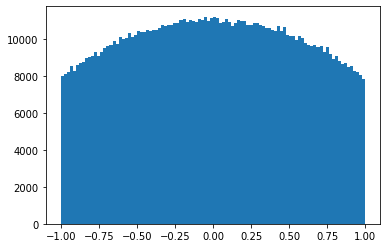

In [13]:
plt.hist(df["costheta_Jpsi"],bins=100)
plt.show();

It matches the distribution in Figure 12 of [this paper](https://arxiv.org/pdf/2007.06957.pdf), which tells us we're doing the correct thing!

Time to do the next decay angle, $\theta_W$:

In [14]:
def calc_theta_W(df):
  """
  Calculate the decay angle theta_W.

    Parameters:
      df -- input DataFrame (must containin the TRUE PX, PY, PZ, E values for each particle)
    
    Returns:
      theta_W -- decay angle values as a numpy array, which can be added to user DataFrame as a new column
  """
  
  #Muon from the Bc decay
  Mu_vars = {"px": "Mu_PX_TRUE",
             "py": "Mu_PY_TRUE",
             "pz": "Mu_PZ_TRUE",
             "e": "Mu_E_TRUE"}
  
  #Muon from the J/psi with the same charge as the Bc
  Jpsi_Mu_vars = {"px": "Jpsi_Mu0_PX_TRUE",
                  "py": "Jpsi_Mu0_PY_TRUE",
                  "pz": "Jpsi_Mu0_PZ_TRUE",
                  "e": "Jpsi_Mu0_E_TRUE"}
  
  #J/psi
  Jpsi_vars = {"px": "Jpsi_PX_TRUE",
               "py": "Jpsi_PY_TRUE",
               "pz": "Jpsi_PZ_TRUE",
               "e": "Jpsi_E_TRUE"}
  
  #Bc
  Bc_vars = {"px": "Bc_PX_TRUE",
             "py": "Bc_PY_TRUE",
             "pz": "Bc_PZ_TRUE",
             "e": "Bc_E_TRUE"}
  
  #4-vectors
  v_Mu = vector.obj(x=df[Mu_vars["px"]],
                    y=df[Mu_vars["py"]],
                    z=df[Mu_vars["pz"]],
                    t=df[Mu_vars["e"]])
  
  v_Jpsi = vector.obj(x=df[Jpsi_vars["px"]],
                      y=df[Jpsi_vars["py"]],
                      z=df[Jpsi_vars["pz"]],
                      t=df[Jpsi_vars["e"]])
  
  v_Bc = vector.obj(x=df[Bc_vars["px"]],
                    y=df[Bc_vars["py"]],
                    z=df[Bc_vars["pz"]],
                    t=df[Bc_vars["e"]])
  
  #W 4-vector = v_Bc - v_Jpsi
  v_W = v_Bc - v_Jpsi
  
  #Boost to Bc rest frame
  Bc_boost_vec = -(v_Bc.to_beta3())
  v_Mu = v_Mu.boost_beta3(Bc_boost_vec)
  v_W = v_W.boost_beta3(Bc_boost_vec)
  v_Bc = v_Bc.boost_beta3(Bc_boost_vec)

  #Boost to W rest frame
  W_boost_vec = -(v_W.to_beta3())
  v_Mu = v_Mu.boost_beta3(W_boost_vec)
  v_Bc = v_Bc.boost_beta3(W_boost_vec)
  
  #3-vectors
  v3_Mu = v_Mu.to_beta3()
  v3_Bc = v_Bc.to_beta3()
  #Unit vectors
  v3_Mu = v3_Mu / v3_Mu.mag
  v3_Bc = v3_Bc / v3_Bc.mag

  #Angle
  theta_W = v3_Mu.deltaangle(-v3_Bc)

  return theta_W

In [15]:
df["theta_W"] = calc_theta_W(df)
df["costheta_W"] = np.cos(df["theta_W"])

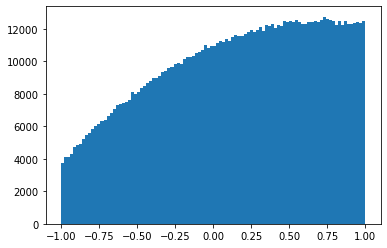

In [16]:
#Plot the angle
plt.hist(df["costheta_W"],bins=100)
plt.show();

Again, the angle distribution is similar to what we see in the [paper](https://arxiv.org/pdf/2007.06957.pdf). Time to move on to the final decay angle, $\chi$.

In [17]:
def calc_chi(df):
  """
  Calculate the decay angle chi.

    Parameters:
      df -- input DataFrame (must containin the TRUE PX, PY, PZ, E values for each particle)
    
    Returns:
      chi -- decay angle values as a numpy array, which can be added to user DataFrame as a new column
  """
  
  #Muon from the Bc decay
  Mu_vars = {"px": "Mu_PX_TRUE",
             "py": "Mu_PY_TRUE",
             "pz": "Mu_PZ_TRUE",
             "e": "Mu_E_TRUE"}
  
  #Muon from the J/psi with the same charge as the Bc
  Jpsi_Mu_vars = {"px": "Jpsi_Mu0_PX_TRUE",
                  "py": "Jpsi_Mu0_PY_TRUE",
                  "pz": "Jpsi_Mu0_PZ_TRUE",
                  "e": "Jpsi_Mu0_E_TRUE"}
  
  #J/psi
  Jpsi_vars = {"px": "Jpsi_PX_TRUE",
               "py": "Jpsi_PY_TRUE",
               "pz": "Jpsi_PZ_TRUE",
               "e": "Jpsi_E_TRUE"}
  
  #Bc
  Bc_vars = {"px": "Bc_PX_TRUE",
             "py": "Bc_PY_TRUE",
             "pz": "Bc_PZ_TRUE",
             "e": "Bc_E_TRUE"}
  
  #4-vectors
  v_Mu = vector.obj(x=df[Mu_vars["px"]],
                    y=df[Mu_vars["py"]],
                    z=df[Mu_vars["pz"]],
                    t=df[Mu_vars["e"]])
  
  v_Jpsi_Mu = vector.obj(x=df[Jpsi_Mu_vars["px"]],
                         y=df[Jpsi_Mu_vars["py"]],
                         z=df[Jpsi_Mu_vars["pz"]],
                         t=df[Jpsi_Mu_vars["e"]])
  
  v_Jpsi = vector.obj(x=df[Jpsi_vars["px"]],
                      y=df[Jpsi_vars["py"]],
                      z=df[Jpsi_vars["pz"]],
                      t=df[Jpsi_vars["e"]])
  
  v_Bc = vector.obj(x=df[Bc_vars["px"]],
                    y=df[Bc_vars["py"]],
                    z=df[Bc_vars["pz"]],
                    t=df[Bc_vars["e"]])
  
  #W 4-vector = v_Bc - v_Jpsi
  v_W = v_Bc - v_Jpsi
  
  #Boost to Bc rest frame
  Bc_boost_vec = -(v_Bc.to_beta3())
  v_Mu = v_Mu.boost_beta3(Bc_boost_vec)
  v_Jpsi_Mu = v_Jpsi_Mu.boost_beta3(Bc_boost_vec)
  v_Jpsi = v_Jpsi.boost_beta3(Bc_boost_vec)
  v_W = v_W.boost_beta3(Bc_boost_vec)
  v_Bc = v_Bc.boost_beta3(Bc_boost_vec)

  v3_Jpsi = v_Jpsi.to_beta3()
  v3_Jpsi = v3_Jpsi / v3_Jpsi.mag

  v3_Jpsi_Mu = v_Jpsi_Mu.to_beta3()
  v3_Jpsi_Mu = v3_Jpsi_Mu / v3_Jpsi_Mu.mag

  v3_Jpsi_Jpsi_Mu = v3_Jpsi.cross(v3_Jpsi_Mu)

  v3_W = v_W.to_beta3()
  v3_W = v3_W / v3_W.mag

  v3_Mu = v_Mu.to_beta3()
  v3_Mu = v3_Mu / v3_Mu.mag

  v3_W_Mu = v3_W.cross(v3_Mu)

  v3_x = v3_Jpsi_Jpsi_Mu / v3_Jpsi_Jpsi_Mu.mag
  v3_z = v3_Jpsi
  v3_y = v3_z.cross(v3_x)
  v3_y = v3_y / v3_y.mag

  C = v3_W_Mu.dot(v3_x)
  S = v3_W_Mu.dot(v3_y)

  chi = np.arctan2(C,S)

  return chi

In [18]:
df["chi"] = calc_chi(df)

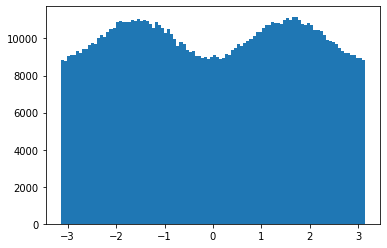

In [19]:
#Plot the angle
plt.hist(df["chi"],bins=100)
plt.show();

Once again, the distribution matches what we see in the paper. So it looks like our decay angle calculations are working 😊

## Momentum transfer in the decay, $q^2$

The momentum transfer $q^2$ is another important quantity in semileptonic $B$ meson decays. It is defined as the square of the invariant mass of the di-lepton system, namely $q^2 = m(\mu^+ \nu_\mu)^2$.

Again we can write a function to calculate it from 4-vectors:

In [20]:
def calc_q2(df):
  """
  Calculate the decay angle chi.

    Parameters:
      df -- input DataFrame (must containin the TRUE PX, PY, PZ, E values for each particle)
    
    Returns:
      q2 -- momentum transfer as a numpy array, which can be added to user DataFrame as a new column
  """

  #J/psi
  Jpsi_vars = {"px": "Jpsi_PX_TRUE",
               "py": "Jpsi_PY_TRUE",
               "pz": "Jpsi_PZ_TRUE",
               "e": "Jpsi_E_TRUE"}
  
  #Bc
  Bc_vars = {"px": "Bc_PX_TRUE",
             "py": "Bc_PY_TRUE",
             "pz": "Bc_PZ_TRUE",
             "e": "Bc_E_TRUE"}

  v_Jpsi = vector.array({
      "px": df[Jpsi_vars["px"]],
      "py": df[Jpsi_vars["py"]],
      "pz": df[Jpsi_vars["pz"]],
      "E": df[Jpsi_vars["e"]]})

  v_Bc = vector.array({
      "px": df[Bc_vars["px"]],
      "py": df[Bc_vars["py"]],
      "pz": df[Bc_vars["pz"]],
      "E": df[Bc_vars["e"]]})

  v_q = v_Bc - v_Jpsi
  q2 = v_q.mass2
  
  return q2

In [21]:
#Add q2 to our DataFrame
df["q2"] = calc_q2(df)

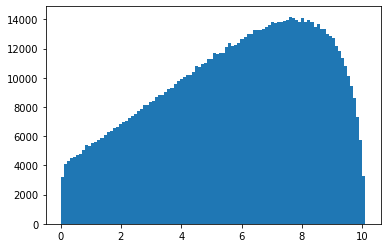

In [22]:
#Plot the q2
plt.hist(df["q2"],bins=100)
plt.show();

The $q^2$ distribution is similar to what is shown in Figure 13 of the paper.

## Saving the DataFrame for further analysis

We will make use of the decay angles and $q^2$ we have calculated in our studies. Primarily, we will want to fit the 3D decay angle distribution in order to measure the underlying decay ampltidues. We will follow the formalism in [this paper](https://arxiv.org/pdf/2007.06956.pdf) to do this.

Right now though, we just want to save our final DataFrame containing our new variables into a new ROOT file.

In [23]:
#Make a new file in our Google Drive, with the same name as our input file but with _Vars added to the end
out_file_path = f"{file_path}_Vars"
outfile = uproot.recreate(f"{out_file_path}.root")

In [24]:
#Add our DataFrame to the file as a TTree with the same name as our input file TTree name
#This might take a little while to run as our DataFrame is quite big
outfile[tree_name] = df

In [26]:
#We can see all the branches in the TTree we have written, including our new variables
outfile[tree_name].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
index                | int64_t                  | AsDtype('>i8')
nEvent               | int32_t                  | AsDtype('>i4')
Bc_M                 | double                   | AsDtype('>f8')
Bc_M_TRUE            | double                   | AsDtype('>f8')
Jpsi_M               | double                   | AsDtype('>f8')
Jpsi_M_TRUE          | double                   | AsDtype('>f8')
Bc_P                 | double                   | AsDtype('>f8')
Bc_P_TRUE            | double                   | AsDtype('>f8')
Jpsi_P               | double                   | AsDtype('>f8')
Jpsi_P_TRUE          | double                   | AsDtype('>f8')
Bc_PT                | double                   | AsDtype('>f8')
Bc_PT_TRUE           | double                   | AsDtype('>f8')
Jpsi_PT              | double                   | AsDtype(

In [27]:
#Close the file to finalise things
outfile.close()

That brings us to the end of the notebook! Using this notebook, and making some of your own, it's time to get familiar with:
 - ROOT files
 - numpy
 - uproot
 - pandas
 - matplotlib

Looking forward, we will be getting into maximum-likelihood fitting, to try and fit the decay angle distribution in order to measure decay amplitudes. For this we will be using the [zfit](https://zfit.readthedocs.io/en/0.3.6/index.html) package.